In [12]:
import os
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import EvalCallback, CallbackList, ProgressBarCallback, EveryNTimesteps, BaseCallback
from stable_baselines3.common.env_util import make_vec_env


In [24]:
class MyCallback(BaseCallback):
    def __init__(self, callback=None, verbose: int = 0):
        super().__init__(verbose=verbose)
        self.callback = callback if callback is not None else lambda: True

    def _on_step(self) -> bool:
        # Log event or other custom action here
        print("My Event!")
        return self.callback()

In [26]:
def myFunction():
    print("My function")

    return True

In [27]:
env_id = "Pendulum-v1"
n_training_envs = 1
n_eval_envs = 5

eval_log_dir = "./eval_logs/"
os.makedirs(eval_log_dir, exist_ok=True)

train_env = make_vec_env(env_id=env_id, n_envs=n_training_envs, seed=0)
eval_env = make_vec_env(env_id, n_envs=n_eval_envs, seed=0, env_kwargs={'g':0.7})

eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir, log_path=eval_log_dir, eval_freq=max(500 // n_training_envs, 1), n_eval_episodes=5, deterministic=True, render=True)
progressBarCallback = ProgressBarCallback()
event_callback = EveryNTimesteps(n_steps=300, callback=MyCallback(verbose=0, callback=myFunction))

callbacks = CallbackList([eval_callback, progressBarCallback, event_callback])

model = SAC("MlpPolicy", train_env)
model.learn(2000, callback=callbacks)



Output()

My Event!

My function

Eval num_timesteps=500, episode_reward=-1390.49 +/- 220.06

Episode length: 200.00 +/- 0.00

New best mean reward!

My Event!

My function

KeyboardInterrupt: 

keys:  KeysView(NpzFile './eval_logs/evaluations.npz' with keys: timesteps, results, ep_lengths)
timesteps [ 500 1000 1500 2000]
results [[ -509.298629  -514.540969  -640.965454 -1434.912264 -1811.234909]
 [ -169.929164   -56.165312   -38.963887  -195.758235   -37.749996]
 [   -5.193494    -4.385853   -25.565464   -27.538595   -94.673313]
 [ -107.091267   -18.006704    -7.421169    -7.59382     -7.548974]]
ep_lengths [[200 200 200 200 200]
 [200 200 200 200 200]
 [200 200 200 200 200]
 [200 200 200 200 200]]


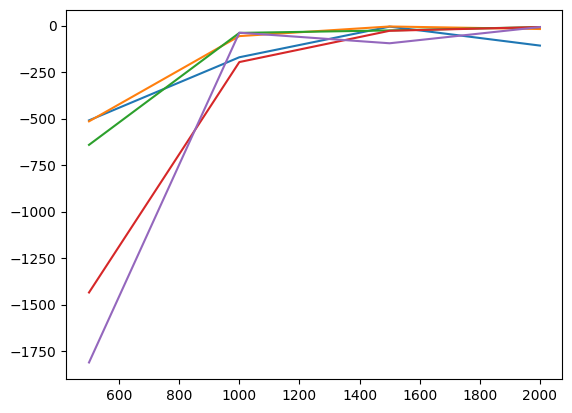

In [11]:
evaluations = np.load(os.path.join(eval_log_dir, "evaluations.npz"))
print("keys: ",evaluations.keys())
for key in evaluations.keys():
    print(key, evaluations[key])

plt.plot(evaluations["timesteps"], evaluations["results"])